In [1]:
import pandas as pd

In [2]:
columns = ['class',
           'Alcohol',
           'Malic acid',
           'Ash',
           'Alcalinity of ash',
           'Magnesium',
           'Total phenols',
           'Flavanoids',
           'Nonflavanoid phenols',
           'Proanthocyanins',
           'Color intensity',
           'Hue',
           'OD280/OD315 of diluted wines',
           'Proline']
df = pd.read_csv("wine.data", names=columns)
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Lets try to use clustering to find same classes

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

In [5]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
linkage_matrix = linkage(X_scaled, method='ward')

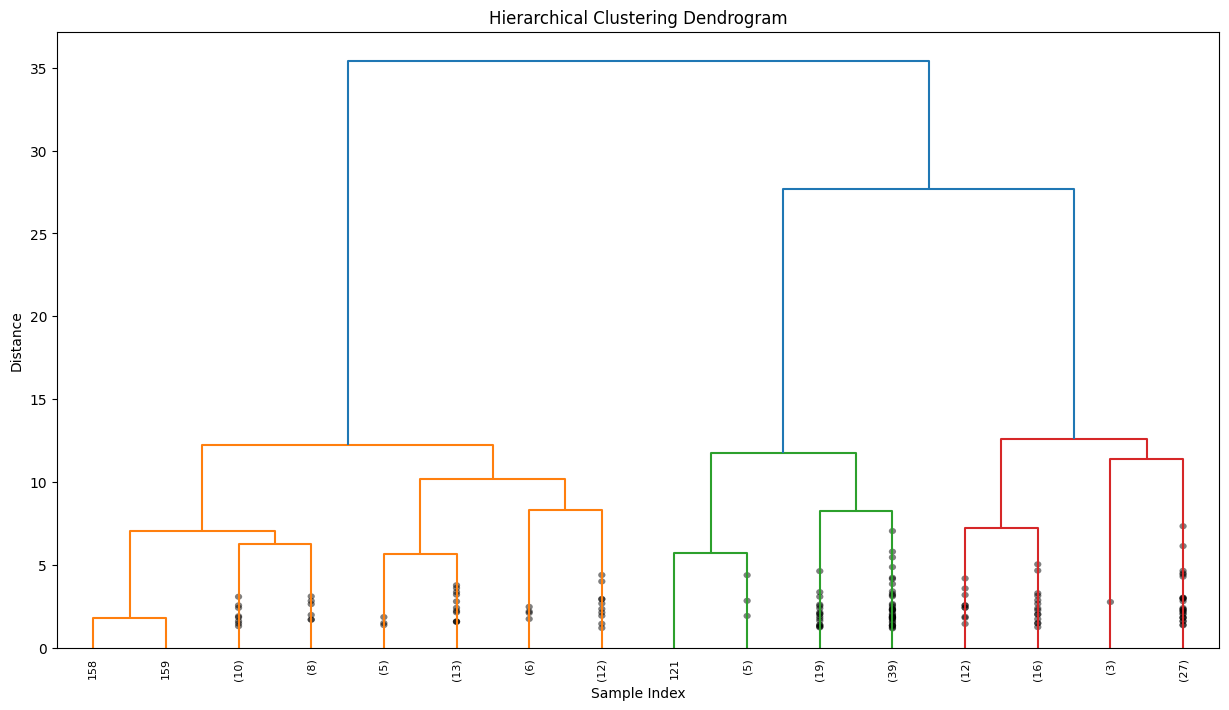

In [9]:
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [10]:
from scipy.cluster.hierarchy import fcluster
k = 3 
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

In [11]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2,
       2, 3, 1, 3, 1, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [12]:
df["clusters"] = clusters

### Lets compare the classes to clusters

In [15]:
ari = adjusted_rand_score(y, clusters)
print(f'Adjusted Rand Index: {ari}')

Adjusted Rand Index: 0.7899332213582837


In [19]:
df.tail(20)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,clusters
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660,1
159,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.750000,0.57,1.78,620,1
160,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.650000,0.56,1.58,520,1
161,3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.880000,0.96,1.82,680,1
162,3,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570,1
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.280000,0.68,1.75,675,1
164,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.580000,0.70,1.68,615,1
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520,1
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.680000,0.85,1.56,695,1
167,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685,1


In [21]:
sum_ = 0
len_ = df.shape[0]
for i, row in df.iterrows():
    if row["class"] == 1 and row["clusters"] == 2:
        sum_ += 1
    if row["class"] == 3 and row["clusters"] == 1:
        sum_ += 1
    if row["class"] == 2 and row["clusters"] == 3:
        sum_ += 1

print(sum_ / len_)

0.9269662921348315


### Summary

accuracy is 0.927 which i consider really good. 